# LA Crime Study

I will be looking at the crimes and arrests data from Los Angeles Police Department (LAPD) and looking for some patterns. I am going to be answering the following questions:
*   What types of games sold the most in the 1980s vs the 2010s?
*   See if total sales are going on average

## Data Sources

The data source I've chosen is from 2020 to Present. 

[LA Crime data from data.gov](https://catalog.data.gov/dataset/crime-data-from-2020-to-present)

## Plan/Design/Methodology/etc.

Here is where I will explain exactly what I'll be doing with the data. I'll also include a few diagrams that represent some of the functions that I'll be creating.

## Code

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load & Display Data

In [2]:
df = pd.read_csv('Crime_Data_from_2020_to_Present.csv')

# Set the dataframe to display all columns
pd.set_option('display.max_columns', None)
# Set the dataframe to display all rows
pd.set_option('display.max_rows', None)
# Look at the first few rows
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,0,M,O,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,19,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,200412582,09/09/2020 12:00:00 AM,09/09/2020 12:00:00 AM,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130


In [3]:
# Display the dataset shape
df.shape

(986873, 28)

In [4]:
# Get data type and non-null count information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986873 entries, 0 to 986872
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           986873 non-null  int64  
 1   Date Rptd       986873 non-null  object 
 2   DATE OCC        986873 non-null  object 
 3   TIME OCC        986873 non-null  int64  
 4   AREA            986873 non-null  int64  
 5   AREA NAME       986873 non-null  object 
 6   Rpt Dist No     986873 non-null  int64  
 7   Part 1-2        986873 non-null  int64  
 8   Crm Cd          986873 non-null  int64  
 9   Crm Cd Desc     986873 non-null  object 
 10  Mocodes         839400 non-null  object 
 11  Vict Age        986873 non-null  int64  
 12  Vict Sex        846266 non-null  object 
 13  Vict Descent    846254 non-null  object 
 14  Premis Cd       986857 non-null  float64
 15  Premis Desc     986291 non-null  object 
 16  Weapon Used Cd  325035 non-null  float64
 17  Weapon Des

### Clean Up & Preprocess The Data

In [5]:
# Convert date columns to datetime
df['Date_Rptd_DT'] = pd.to_datetime(df['Date Rptd'])
df['Date_OCC_DT'] = pd.to_datetime(df['DATE OCC'])

# Convert numeric columns (like LAT/LON) to float if not already
df['LAT'] = pd.to_numeric(df['LAT'], errors='coerce')
df['LON'] = pd.to_numeric(df['LON'], errors='coerce')

# Check and convert categorical columns
categorical_cols = ['AREA NAME', 'Crm Cd Desc', 'Status Desc', 'Premis Desc']
for c in categorical_cols:
    df[c] = df[c].astype('category')

In [6]:
# Check missing values in the dataset
missing_values = df.isnull().sum()
missing_values

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           147473
Vict Age               0
Vict Sex          140607
Vict Descent      140619
Premis Cd             16
Premis Desc          582
Weapon Used Cd    661838
Weapon Desc       661838
Status                 1
Status Desc            0
Crm Cd 1              11
Crm Cd 2          918239
Crm Cd 3          984577
Crm Cd 4          986813
LOCATION               0
Cross Street      834910
LAT                    0
LON                    0
Date_Rptd_DT           0
Date_OCC_DT            0
dtype: int64

In [7]:
# Drop the most empty columns
df.drop(['Crm Cd 2','Crm Cd 3','Crm Cd 4','Cross Street','Date Rptd','DATE OCC','Weapon Used Cd','Weapon Desc','Mocodes'], axis=1, inplace=True)

In [8]:
# Check duplicate rows
duplicate_rows = df[df.duplicated()]
len(duplicate_rows)

53448

In [9]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

In [10]:
# Display dataset shape
df.shape

(933425, 21)

In [11]:
# Check victim Age should be in between 0 to 100
if 'Vict Age' in df.columns:
    invalid_age_mask = (df['Vict Age'] < 0) | (df['Vict Age'] > 100)
    # invalid_ages = df[invalid_age_mask]
    # print("Invalid ages found:\n", invalid_ages[['Vict Age']])

    # Drop rows with invalid ages if necessary
    df = df[~invalid_age_mask]


In [12]:
# Clean and Standardize String Fields
# Trim whitespace and convert crime description to upper case
df['Crm Cd Desc'] = df['Crm Cd Desc'].str.strip().str.upper()

# Standardize common terms if there are duplicates:
# "VEHICLE STOLEN" and "VEHICLE - STOLEN" should be the same
df['Crm Cd Desc'] = df['Crm Cd Desc'].replace({
    'VEHICLE STOLEN': 'VEHICLE - STOLEN'
})

# Fill the missing value with "X"
df['Vict Descent'] = df['Vict Descent'].fillna('X')
df['Vict Sex'] = df['Vict Sex'].fillna('X')

In [13]:
# Drop rows with empty values
df.dropna(subset=['Premis Cd', 'Premis Desc', 'Crm Cd 1'], inplace=True)

In [14]:
missing_values = df.isnull().sum()
missing_values

DR_NO           0
TIME OCC        0
AREA            0
AREA NAME       0
Rpt Dist No     0
Part 1-2        0
Crm Cd          0
Crm Cd Desc     0
Vict Age        0
Vict Sex        0
Vict Descent    0
Premis Cd       0
Premis Desc     0
Status          0
Status Desc     0
Crm Cd 1        0
LOCATION        0
LAT             0
LON             0
Date_Rptd_DT    0
Date_OCC_DT     0
dtype: int64

In [15]:
df.shape

(932757, 21)

In [16]:
# Take a final look at the cleaned dataset
df.sample(5)

,DR_NO,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON,Date_Rptd_DT,Date_OCC_DT
47809,201217506,1400,12,77th Street,1248,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),56,M,B,101.0,STREET,IC,Invest Cont,420.0,800 W 64TH ST,33.9810,-118.2877,2020-07-29,2020-07-29
748549,231805778,45,18,Southeast,1837,2,354,THEFT OF IDENTITY,31,F,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,354.0,10900 WILMINGTON AV,33.9363,-118.2426,2023-02-03,2023-02-03
795319,230216488,100,2,Rampart,289,1,510,VEHICLE - STOLEN,0,X,X,101.0,STREET,IC,Invest Cont,510.0,1100 BLAINE ST,34.0453,-118.2715,2023-09-01,2023-09-01
614894,221006587,1620,10,West Valley,1011,2,900,VIOLATION OF COURT ORDER,31,F,O,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",AA,Adult Arrest,900.0,19400 SHERMAN WY,34.2012,-118.5445,2022-03-10,2022-03-10
436256,221911639,640,19,Mission,1924,2,901,VIOLATION OF RESTRAINING ORDER,34,F,B,501.0,SINGLE FAMILY DWELLING,AO,Adult Other,901.0,15000 POLK ST,34.2992,-118.4592,2022-07-06,2022-07-04


### Check Out The Distribution Of Crimes

In [17]:
# Show different crimes
# unique_crimes = df['Crm Cd Desc'].unique()
# print(unique_crimes)
crime_desc_counts = df['Crm Cd Desc'].value_counts()
crime_desc_counts

VEHICLE - STOLEN                                            106541
BATTERY - SIMPLE ASSAULT                                     70330
BURGLARY FROM VEHICLE                                        58974
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)      57052
THEFT OF IDENTITY                                            56698
BURGLARY                                                     53980
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT               49951
THEFT PLAIN - PETTY ($950 & UNDER)                           49584
INTIMATE PARTNER - SIMPLE ASSAULT                            43141
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)              37935
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)          34244
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD     32492
ROBBERY                                                      30358
SHOPLIFTING - PETTY THEFT ($950 & UNDER)                     28934
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                     2

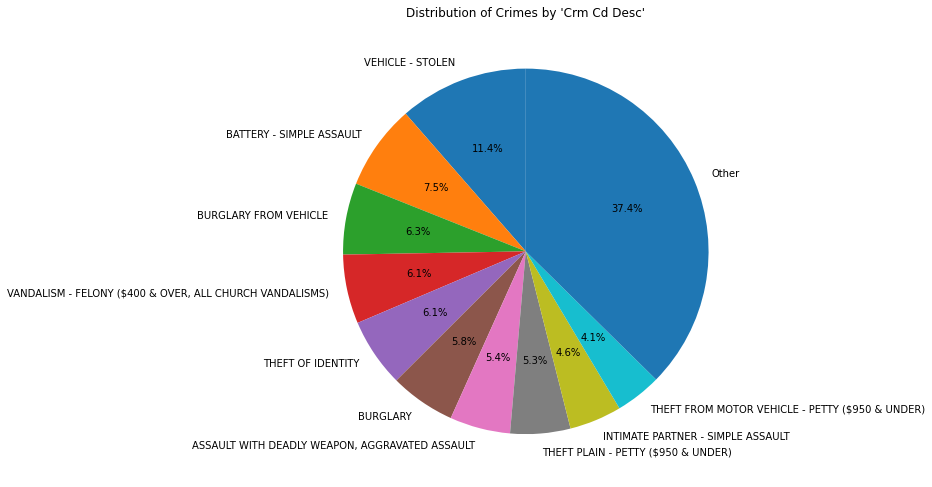

In [18]:
# Draw the pie chart
top_n = 10
top_crimes = crime_desc_counts.head(top_n)
other_count = crime_desc_counts.iloc[top_n:].sum()
if other_count > 0:
    top_crimes = top_crimes.append(pd.Series({'Other': other_count}))

# Create a pie chart
plt.figure(figsize=(12,12), facecolor='white')
plt.pie(top_crimes.values, labels=top_crimes.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Crimes by 'Crm Cd Desc'")
plt.tight_layout()
plt.show()

### Temporal Patterns in Crime Types 
Identify if certain crime types have distinct time-of-day patterns.

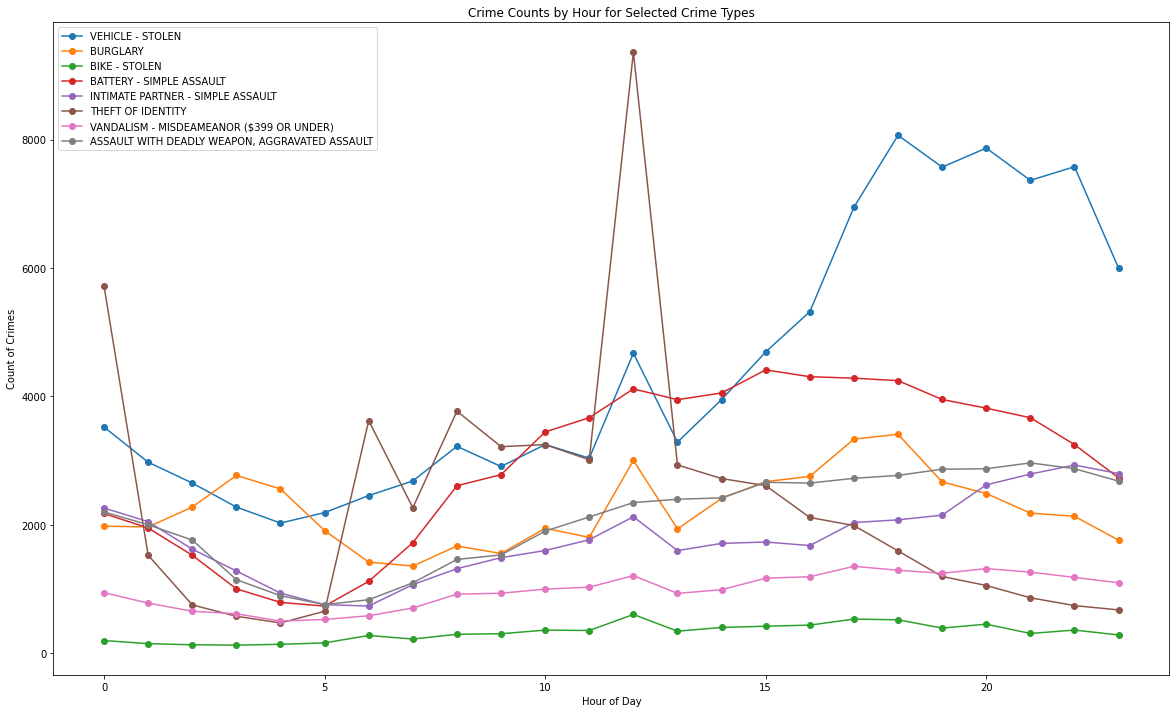

In [19]:
# Convert TIME OCC to an hour if it is in a string format like "2130" meaning 21:30
df['TIME_OCC_STR'] = df['TIME OCC'].astype(str).str.zfill(4)  
df['HOUR'] = df['TIME_OCC_STR'].str[:2].astype(int)

# Group by crime code description and hour
hourly_counts = df.groupby(['Crm Cd Desc', 'HOUR']).size().reset_index(name='count')

crime_types_of_interest = ["VEHICLE - STOLEN", "BURGLARY", "BIKE - STOLEN", "BATTERY - SIMPLE ASSAULT", "INTIMATE PARTNER - SIMPLE ASSAULT","THEFT OF IDENTITY","VANDALISM - MISDEAMEANOR ($399 OR UNDER)","ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT"]
# crime_types_of_interest = [""]
filtered = hourly_counts[hourly_counts['Crm Cd Desc'].isin(crime_types_of_interest)]

# Plot using matplotlib
plt.figure(figsize=(20,12))
for crime_type in crime_types_of_interest:
    subset = filtered[filtered['Crm Cd Desc'] == crime_type]
    plt.plot(subset['HOUR'], subset['count'], marker='o', label=crime_type)

plt.title("Crime Counts by Hour for Selected Crime Types")
plt.xlabel("Hour of Day")
plt.ylabel("Count of Crimes")
plt.legend()
plt.show()

### Geographic Hotspots for Specific Crimes
Identify areas with high incidence of a particular crime.

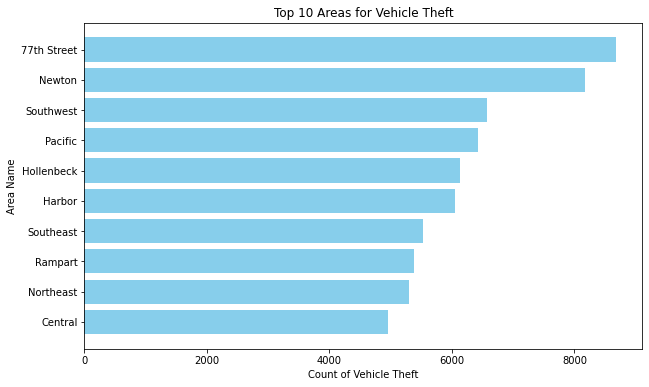

In [20]:
vehicle_theft_area = df[df['Crm Cd Desc'] == 'VEHICLE - STOLEN'].groupby('AREA NAME').size().reset_index(name='count')
top_10_areas = vehicle_theft_area.sort_values('count', ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(top_10_areas['AREA NAME'], top_10_areas['count'], color='skyblue')
plt.gca().invert_yaxis()  # invert y-axis to have largest on top
plt.title("Top 10 Areas for Vehicle Theft")
plt.xlabel("Count of Vehicle Theft")
plt.ylabel("Area Name")
plt.show()

### Influence of Location Type (Premise)
Compare the distribution of crimes by premise type.

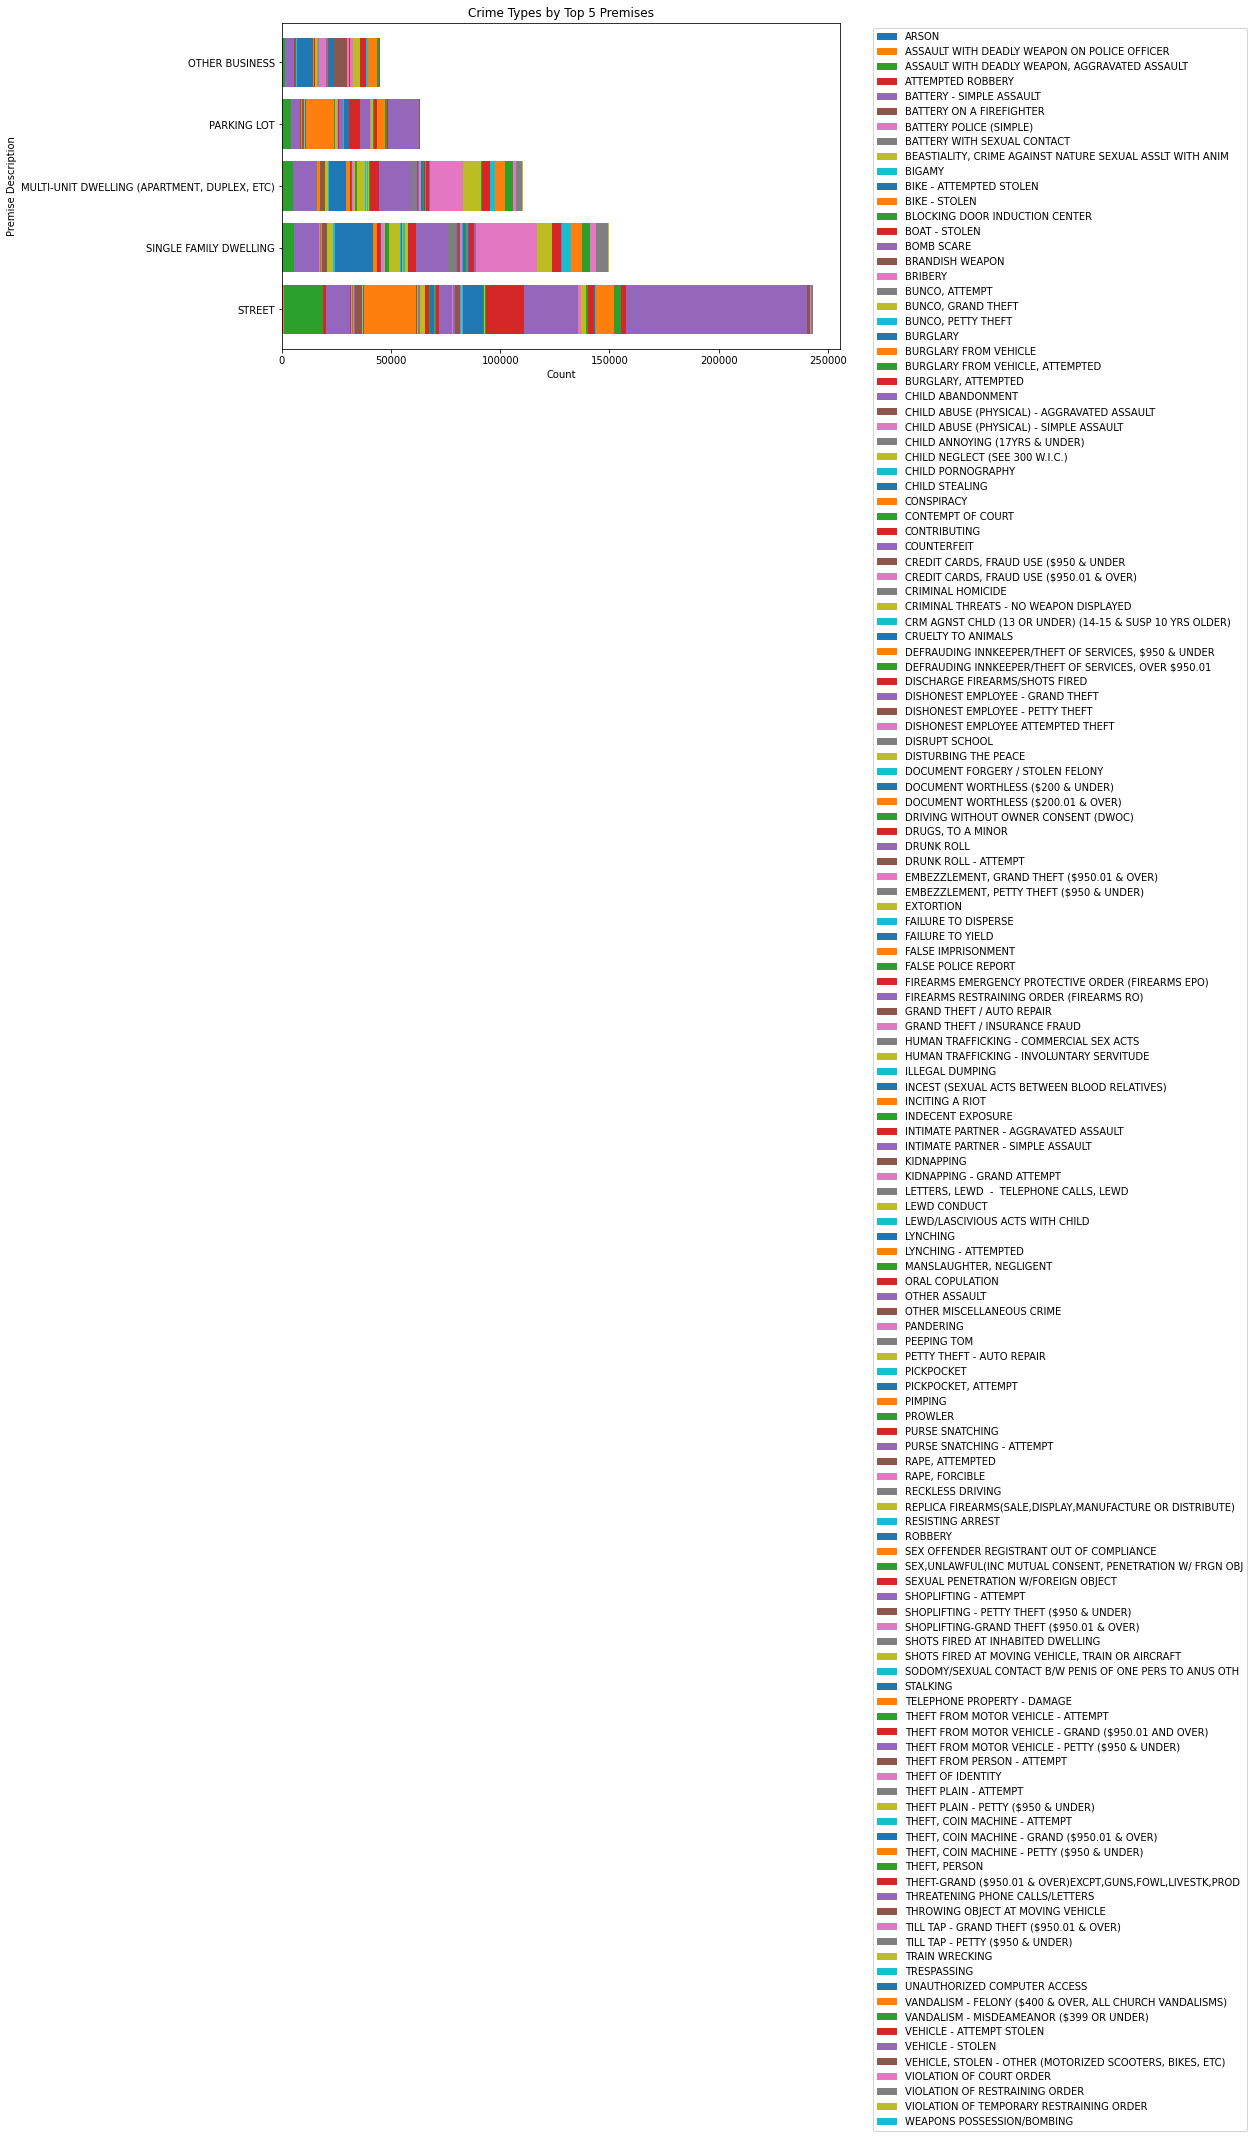

In [21]:
premise_counts = df.groupby(['Premis Desc', 'Crm Cd Desc']).size().reset_index(name='count')

# Get top 5 premises by total crime count
top_premises = premise_counts.groupby('Premis Desc')['count'].sum().nlargest(5).index
filtered_premise = premise_counts[premise_counts['Premis Desc'].isin(top_premises)]

# A stacked bar chart (one bar per premise, segments for crime types)
premise_list = list(top_premises)
crime_types = filtered_premise['Crm Cd Desc'].unique()

# Create a pivot table for stacking
pivot_data = filtered_premise.pivot(index='Premis Desc', columns='Crm Cd Desc', values='count').fillna(0)
pivot_data = pivot_data.reindex(premise_list)  # align with top_premises order

bottom = np.zeros(len(pivot_data))
plt.figure(figsize=(10,6))
for ct in crime_types:
    plt.barh(pivot_data.index, pivot_data[ct], left=bottom)
    bottom += pivot_data[ct]

plt.title("Crime Types by Top 5 Premises")
plt.xlabel("Count")
plt.ylabel("Premise Description")
plt.legend(crime_types, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Arrest Status and Crime Type Correlation
Compare arrest likelihood by crime type.

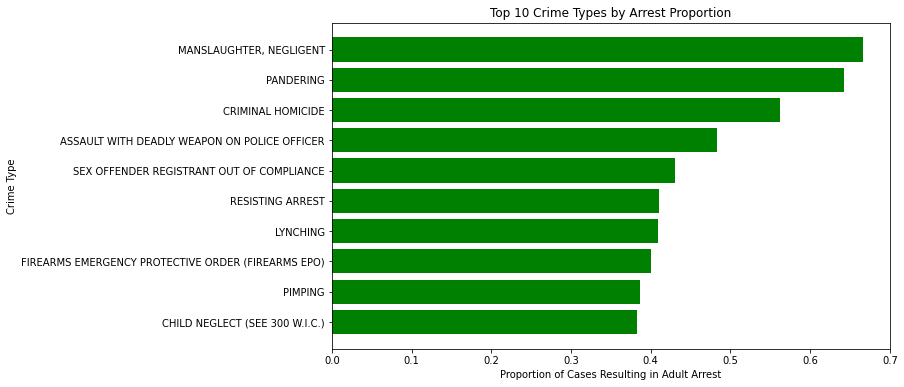

In [22]:
arrest_counts = df.groupby(['Crm Cd Desc', 'Status Desc']).size().reset_index(name='count')
total_per_crime = arrest_counts.groupby('Crm Cd Desc')['count'].sum()

arrest_counts['proportion'] = arrest_counts.apply(lambda x: x['count']/total_per_crime[x['Crm Cd Desc']], axis=1)

arrest_data = arrest_counts[arrest_counts['Status Desc'] == 'Adult Arrest'].sort_values('proportion', ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(arrest_data['Crm Cd Desc'], arrest_data['proportion'], color='green')
plt.gca().invert_yaxis()
plt.title("Top 10 Crime Types by Arrest Proportion")
plt.xlabel("Proportion of Cases Resulting in Adult Arrest")
plt.ylabel("Crime Type")
plt.show()


### Demographic Factors and Victimization
Examine victim demographics across crime types.

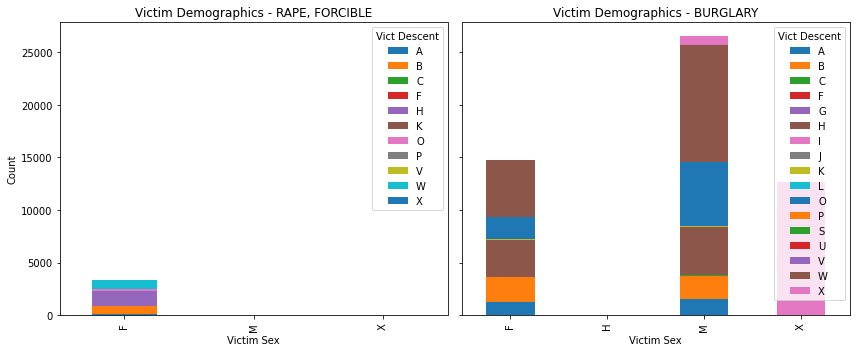

In [23]:
demographic_counts = df.groupby(['Crm Cd Desc', 'Vict Sex', 'Vict Descent']).size().reset_index(name='count')

selected_crimes = ["RAPE, FORCIBLE", "BURGLARY"]
demo_filtered = demographic_counts[demographic_counts['Crm Cd Desc'].isin(selected_crimes)]

# Create separate subplots for each crime type:
fig, axes = plt.subplots(1, len(selected_crimes), figsize=(12, 5), sharey=True)

for i, crime_type in enumerate(selected_crimes):
    subset = demo_filtered[demo_filtered['Crm Cd Desc'] == crime_type]
    # Create a pivot table to show counts by Sex vs Descent
    pivot_data = subset.pivot(index='Vict Sex', columns='Vict Descent', values='count').fillna(0)
    pivot_data.plot(kind='bar', ax=axes[i], stacked=True)
    axes[i].set_title(f"Victim Demographics - {crime_type}")
    axes[i].set_xlabel("Victim Sex")
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()


### Seasonal or Yearly Trends
Examine how crime frequency changes over time.

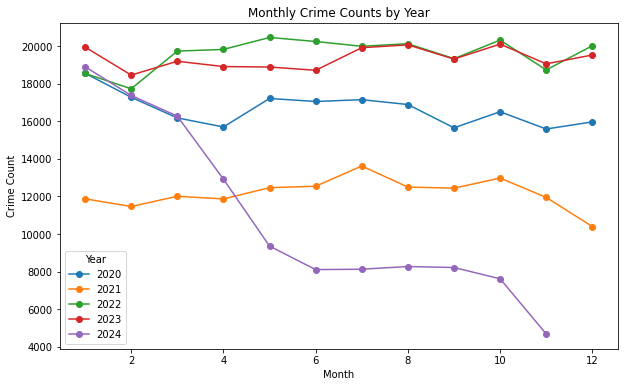

In [24]:
df['YEAR'] = df['Date_OCC_DT'].dt.year
df['MONTH'] = df['Date_OCC_DT'].dt.month

monthly_counts = df.groupby(['YEAR', 'MONTH']).size().reset_index(name='count')

plt.figure(figsize=(10,6))
for year in monthly_counts['YEAR'].unique():
    subset = monthly_counts[monthly_counts['YEAR'] == year]
    plt.plot(subset['MONTH'], subset['count'], marker='o', label=str(year))

plt.title("Monthly Crime Counts by Year")
plt.xlabel("Month")
plt.ylabel("Crime Count")
plt.legend(title='Year')
plt.show()


## Conclusion
Based on the analysis above, what happened? A graph/chart or two would go here.